IMPORTING THE LIBRARIES

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

import the dataset

In [4]:
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [5]:
df.describe()


,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
df.isnull()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4335,False,False,False,False,False,False,False,False
4336,False,False,False,False,False,False,False,False
4337,False,False,False,False,False,False,False,False
4338,False,False,False,False,False,False,False,False


In [7]:
print(df.isnull().sum())


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


spliting the dependent and independent variables

In [8]:
df = df.drop('name', axis=1)
print(df)

      year  selling_price  km_driven    fuel seller_type transmission  \
0     2007          60000      70000  Petrol  Individual       Manual   
1     2007         135000      50000  Petrol  Individual       Manual   
2     2012         600000     100000  Diesel  Individual       Manual   
3     2017         250000      46000  Petrol  Individual       Manual   
4     2014         450000     141000  Diesel  Individual       Manual   
...    ...            ...        ...     ...         ...          ...   
4335  2014         409999      80000  Diesel  Individual       Manual   
4336  2014         409999      80000  Diesel  Individual       Manual   
4337  2009         110000      83000  Petrol  Individual       Manual   
4338  2016         865000      90000  Diesel  Individual       Manual   
4339  2016         225000      40000  Petrol  Individual       Manual   

             owner  
0      First Owner  
1      First Owner  
2      First Owner  
3      First Owner  
4     Second Owner

In [10]:
x = df.drop(columns=['selling_price'])
print(x)


      year  km_driven    fuel seller_type transmission         owner
0     2007      70000  Petrol  Individual       Manual   First Owner
1     2007      50000  Petrol  Individual       Manual   First Owner
2     2012     100000  Diesel  Individual       Manual   First Owner
3     2017      46000  Petrol  Individual       Manual   First Owner
4     2014     141000  Diesel  Individual       Manual  Second Owner
...    ...        ...     ...         ...          ...           ...
4335  2014      80000  Diesel  Individual       Manual  Second Owner
4336  2014      80000  Diesel  Individual       Manual  Second Owner
4337  2009      83000  Petrol  Individual       Manual  Second Owner
4338  2016      90000  Diesel  Individual       Manual   First Owner
4339  2016      40000  Petrol  Individual       Manual   First Owner

[4340 rows x 6 columns]


In [11]:
y = df['selling_price']
print(y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [12]:
x.dtypes


,0
year,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object


test train split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
 # fuel, seller_type, transmission, owner
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), [2, 3, 4, 5])
    ],
    remainder='passthrough'
)

# Transform X
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)
print(X_train)
print(X_test)

[[0.000e+00 1.000e+00 0.000e+00 ... 0.000e+00 2.017e+03 2.000e+04]
 [0.000e+00 1.000e+00 0.000e+00 ... 0.000e+00 2.018e+03 5.000e+04]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 2.013e+03 2.500e+04]
 ...
 [0.000e+00 1.000e+00 0.000e+00 ... 0.000e+00 2.016e+03 5.100e+04]
 [0.000e+00 1.000e+00 0.000e+00 ... 0.000e+00 2.013e+03 8.000e+04]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 2.013e+03 8.000e+04]]
[[0.0000e+00 1.0000e+00 0.0000e+00 ... 0.0000e+00 2.0100e+03 8.0000e+04]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 2.0190e+03 2.7000e+04]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 2.0080e+03 4.1723e+04]
 ...
 [0.0000e+00 1.0000e+00 0.0000e+00 ... 0.0000e+00 2.0110e+03 4.0000e+04]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 2.0170e+03 6.4800e+03]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 2.0190e+03 3.0000e+04]]


In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

simple linear regression

In [16]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

Predicting the test set

In [17]:
y_pred = model.predict(X_test_scaled)
print("R2 score:", r2_score(y_test, y_pred))


R2 score: 0.4031303601432117


In [ ]:

mse = mean_squared_error(y_test,y_pred)


print(f'MSE:{mse}')


MSE:182146878750.28098


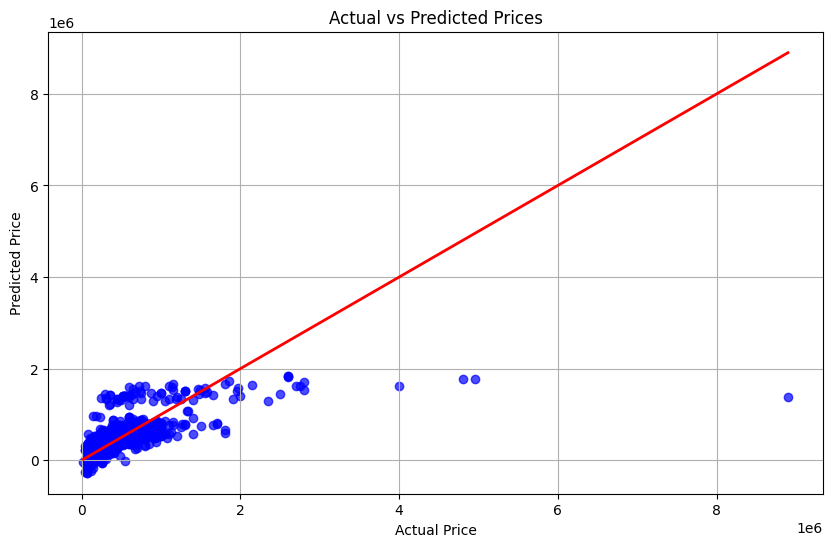

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

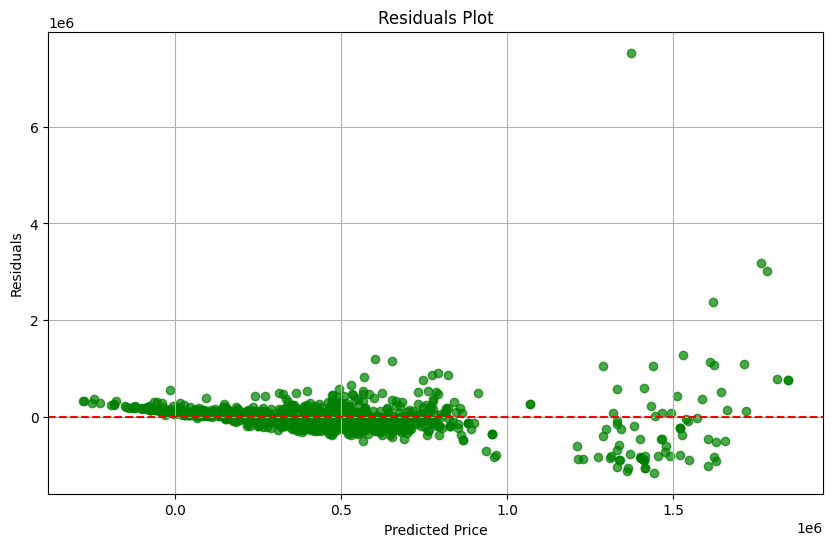

In [ ]:
# Residual plot
plt.figure(figsize=(10,6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7, color='g')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()
